<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/dimension_reduction/singular_value_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVD(Singular Value Decomposition) - 특이값 분해
- PCA와 유사한 행렬 분해 기법을 이용하지만 PCA와 다르게 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음

일반적으로 SVD는 m x n 의 크기의 행렬 A를 다음과 같이 분해함
$$A = U\sum{V^T}$$
행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이 벡터는 직교하는 성질을 가진다.  
$∑$는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치 값 모두 0이다.  
$∑$이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다.
- SVD는 $A$의 차원이 m x n일때
  - $U$의 차원이 m x n
  - $∑$의 차원이  m x n
  - $V^T$의 차원이 m x n  

  으로 분해한다.

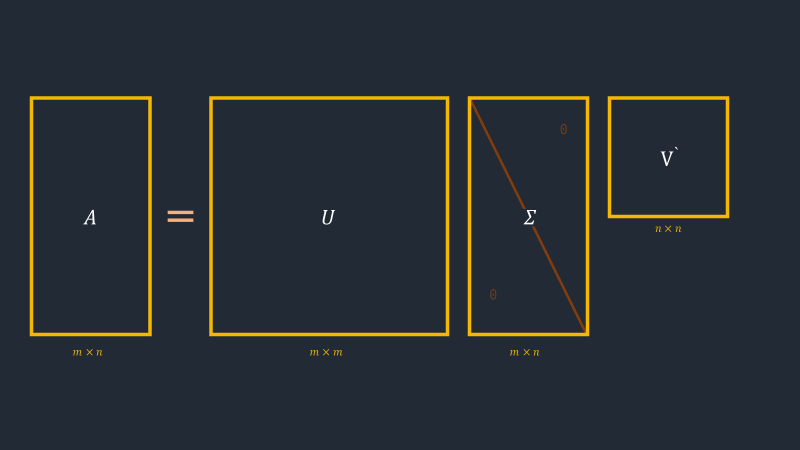

하지만 일반적으로는 다음과 같이 $∑$의 비대각 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고  
제거된 $∑$에 대응되는 $U$와 $V$원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다.

이렇게 컴팩트한 형태로 SVD를 적용하면
-  $A$의 차원이 $m × n$ 일때
  - $U$의 차원이  $m × p$
  - $∑$의 차원이 $p × p$
  - $V^T$의 차원이 $p × n$
으로 분해된다.    

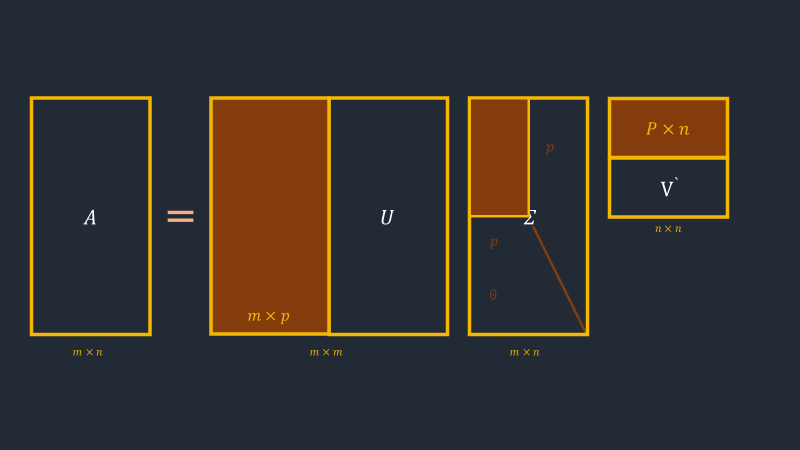

## 코드구현

Truncated SVD는 $\sum$의 대각원소 중에 상위 몇개만 추출해서 여기에 대응하는 $U$와 $V$의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해한 것

일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행함  

넘파이의 SVD를 이용해 SVD 연산을 수행하고, SVD로 분해가 어떤 식으로 되는지 간단한 예제를 통해 살펴보겠음  

### Numpy SVD

In [2]:
#넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이렇게 생성된 a행렬에 SVD를 적용해 $U$ $Sigma$ $V_t$를 도출하겠음  

SVD분해는 numpy.linalg.svd 파라미터로 원본 행렬을 입력하면   
$U$ 행렬, $Sigma$ 행렬, $V$ 전치 행렬을 반환함  
$Sigma$ 행렬의 경우, $A = U∑V^T$에서 $∑$ 행렬을 나타내며  
$∑$ 행렬의 경우 행렬의 대각에 위치한 값만 0이아니고, 그렇지 않은 경우 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현

In [4]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("U matrix :\n", np.round(U, 3))
print("Sigma Value : \n", np.round(Sigma, 3))
print("V transpose matrix : \n", np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix :
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value : 
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


$U$행렬이 4x4, $V_t$행렬이 4x4로 반환, $Sigma$의 경우 1차원 행렬이 (4, )로 반환되었음 

분해된 이 $U$, $Sigma$, $V_t$를 이용해 다시 원본 행렬로 정확히 복원되는지 확인해 보겠음  

원본 행룔로의 복원은 이 $U$, $Sigma$, $V_t$를 내적하면 됨  
- $Sigma$의 경우 0이 아닌값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 한다

In [8]:
#Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
print("Sigma_mat : \n", np.round(Sigma_mat, 3))
a_  = np.dot(np.dot(U, Sigma_mat), Vt)
print("a_ : \n",np.round(a_, 3))

Sigma_mat : 
 [[3.423 0.    0.    0.   ]
 [0.    2.023 0.    0.   ]
 [0.    0.    0.463 0.   ]
 [0.    0.    0.    0.079]]
a_ : 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


$U$, $Sigma$, $V_t$를 이용해 a_ 는 원본 행렬 a와 동일하게 복원됨을 알 수 있다.   
이번에는 데이터 세트가 로욱 간 의존성이 있을 경우 어떻게 $Sigma$ 값이 변하고, 이에 따른 차원 축소가 진행 될 수 있는지 알아보겠음
- 일부러 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트 하고,  
 4번째 로우는 첫 번째 로우와 같다고 업데이트 하겠음 

In [10]:
a[2] = a[0] + a[1]
a[3] = a[0]
print("a : \n", np.round(a, 3))

a : 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [11]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("U matrix :\n", np.round(U, 3))
print("Sigma Value : \n", np.round(Sigma, 3))
print("V transpose matrix : \n", np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix :
 [[ 0.246  0.583  0.76  -0.15 ]
 [-0.774 -0.017  0.365  0.516]
 [-0.529  0.566 -0.365 -0.516]
 [ 0.246  0.583 -0.395  0.666]]
Sigma Value : 
 [2.663 0.807 0.    0.   ]
V transpose matrix : 
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.389 -0.784  0.479  0.07 ]
 [-0.6    0.13  -0.376  0.694]]


이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했음  
즉 선형 독립인 로우 벡터의 개수가 2개라는 의미이다.  
이렇게 분해된 $U$, $Sigma$, $V_t$를 이요해 다시 원본 행렬로 복원 해보겠음
- $Sigma$의 0에 대응되는 $U$, $Sigma$, $V_t$의 데이터를 제외하고 복원하겠음
- 즉, $Sigma$의 경우 앞의 2개 요소만 0이 아니므로 $U$ 행렬 중 선행 두 개의 열만 추출
- $V_t$의 경우 선행 두개의 행만 추출


In [12]:
#U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

#V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)

#U_, Sigma_, Vt_ 내적 수행하며 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_),Vt_)
print("a_ : \n", np.round(a_, 3))



(4, 2) (2, 2) (2, 4)
a_ : 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


### Truncated SVD
$∑$ 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식  
이렇게 분해하면 인위적으로 더 작은 차원의 $U$, $∑$, $V^T$로 분해하기 때문에 원본행렬을 정확하게 다시 원복할 수는 없음  
하지만 데어 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있음  
- 원래 차원에 가깝게 잘라낼수록(Truncated) 원본 행렬에 더 가깝게 복원할 수 있음

사이파이 모듈을 이용하여 테스트
- 사이파이의 SVD : scipy.linalg.svd
- Truncated SVD : scipy.sparse.linalg.svds

임의의 원본 행렬 6 x 6을 Normal SVD로 분해해 분해된 행렬의 차원과 $Sigma$ 행렬 내의 특이값을 확인한 뒤  
 다시 Truncated SVD로 분해해 분해된 행렬의 차원, $Sigma$ 행렬 내의 특이값,   
 그리고 Truncated SVD로 분해된 행렬의 내적을 게산하여 다시 복원된 데이터와 원본 데이터 비교  

In [14]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print("원본 행렬 : \n", matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원 : ', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬 : ', Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print("\nTruncated SVD 분해 행렬 차원 : ", U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬 : ', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print("\nTruncated SVD로 분해 후 복원 행렬 :\n", matrix_tr)

원본 행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 :  (6, 6) (6,) (6, 6)

Sigma값 행렬 :  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685

6 x 6행렬을 SVD로 분해하면 $U$, $Sigma$, $V_t$가 각각 (6,6), (6,), (6,6) 차원이지만,  
Truncated SVD의 n_components를 4로 설정해 $U$, $Sigma$, $V_t$를 각각 (6,4) (4,), (4,6)로 각각 분해  

Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 확인할 수 있음  

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- 붓꽃 데이터 세트를 TruncatedSVD를 이용해 변환

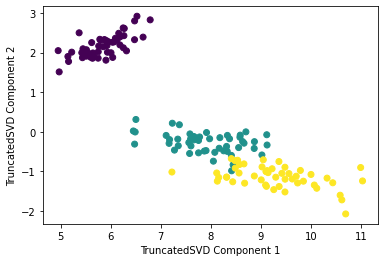

In [15]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel("TruncatedSVD Component 1")
plt.ylabel("TruncatedSVD Component 2")
plt.show()

Truncated SVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정로고 각 변환 속성으로 뛰어난 고유성을 가지고 있음  

Text(0.5, 1.0, 'PCA Transformed')

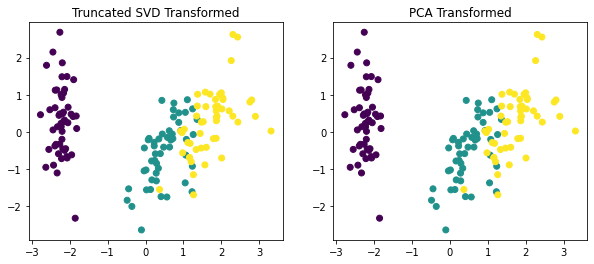

In [17]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TruncatedSVD 수행
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA변환 수행
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

f, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax[1].scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax[0].set_title('Truncated SVD Transformed')
ax[1].set_title('PCA Transformed')


데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행함  
이는 PCA가 SVD 알고리즘으로 구현 됐음을 의미함  
하지만 PCA는 밀집 행렬에 대한 변환만 가능하고 SVD는 희소 행렬에 대한 변환도 가능하다.  

SVD는 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됨

또한 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘이다.  